In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# if these don't import correctly
# pip install pandas patsy
import pandas as pd
import patsy as pt

In [46]:
def metropolis_step(theta, logf, data, stepsize, rng):
    thetastar = rng.normal(loc = theta, scale = stepsize, size = np.shape(theta))
    r = np.minimum(0, logf(thetastar, data) - logf(theta, data))
    u = np.log(rng.uniform())
    if u < r:
        theta = thetastar
    return theta

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/finches.csv")

In [48]:
y, X = pt.dmatrices("winglength ~ middletoelength", data = df)

In [49]:
def lm(theta, X):
    N = np.shape(X)[0]
    beta = theta[:-1]
    yhat = np.zeros(N)
    for n in range(N):
        yhat[n] = np.sum(beta * X[n, :])
    return yhat

def lm(theta, X):
    beta = theta[:-1]
    return X @ beta

In [50]:
def normal_ll(theta, data):
    X = data["X"]
    y = data["y"]
    sigma = theta[-1]
    return np.sum(st.norm(loc = lm(theta, X), scale = sigma).logpdf(y))

def prior_beta(theta, data):
    beta = theta[:-1]
    return np.sum(st.norm(loc = 0, scale = 1).logpdf(beta))

def prior_sigma(theta, data):
    sigma = theta[-1]
    return st.expon(scale = 1).logpdf(sigma)

def posterior(theta, data):
    return normal_ll(theta, data) + prior_beta(theta, data) + prior_sigma(theta, data)

In [62]:
rng = np.random.default_rng()
M = 10_000
data = {"y": y[:, 0], "X": X}
thetas = np.zeros(shape = (M, 3))
thetas[0] = rng.uniform(size = 3)
for m in range(1, M):
    thetas[m] = metropolis_step(thetas[m-1], posterior, data, 0.05, rng)

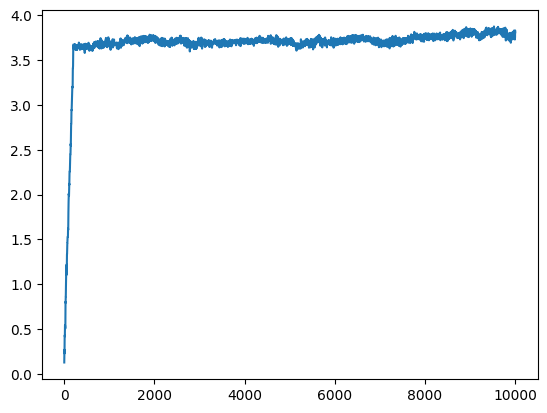

In [69]:
idx = np.arange(M)
plt.plot(idx, thetas[:, 1]);